In [34]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


In [35]:
#creazione dataframe con nodi e archi
path1 = "/Users/antoniobaio/Desktop/Progetti/ProgettiDS/NetworkX/data/hero-network.csv"
nodes = pd.read_csv(path1)
nodes.head()

hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL

In [36]:
path2 = "/Users/antoniobaio/Desktop/Progetti/ProgettiDS/NetworkX/data/edges.csv"
edges = pd.read_csv(path2)
edges.head()

hero   comic
0  24-HOUR MAN/EMMANUEL  AA2 35
1  3-D MAN/CHARLES CHAN   AVF 4
2  3-D MAN/CHARLES CHAN   AVF 5
3  3-D MAN/CHARLES CHAN   COC 1
4  3-D MAN/CHARLES CHAN  H2 251

In [37]:
H = nx.from_pandas_edgelist(nodes, source='hero1', target='hero2')

In [38]:
G = H.copy()

remove = [node for node,degree in dict(G.degree()).items() if degree < 450]
G.remove_nodes_from(remove)

print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

Numero di nodi: 87
Numero di archi: 3429


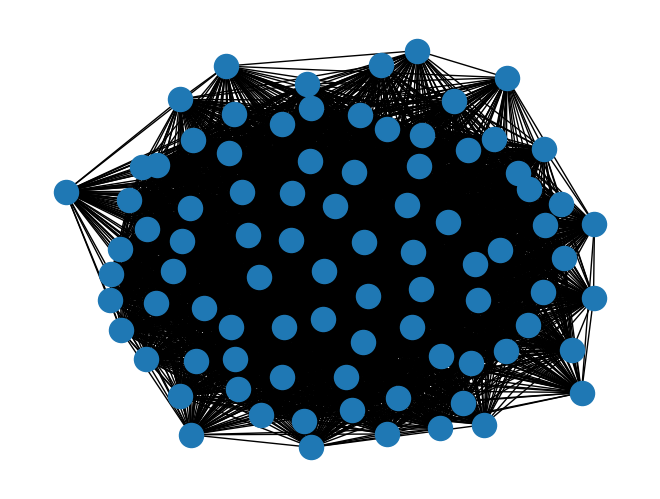

In [16]:
nx.draw(G)

# PROSSIMI PASSI

- sottografo dal grafo principale contenente nodi sopra una certa soglia di grado
- spring_layout, spyral_layout, Kamada_kaway_layout”

In [17]:
print("NODI: ", len(G.nodes))
print("ARCHI: ", len(G.edges))
print("DENSITA", nx.density(G))
print("RAGGIO: ", nx.radius(G))
print("DIAMETRO: ", nx.diameter(G))
print("PERIFERIA: ", nx.periphery(G)[:10])
print("CLUSTERING: %0.3f" % nx.average_clustering(G))
print("IS CONNECTED: ", nx.is_connected(G))

NODI:  87
ARCHI:  3429
DENSITA 0.9165998396150762
RAGGIO:  1
DIAMETRO:  2
PERIFERIA:  ["BLACK PANTHER/T'CHAL", 'IRON MAN/TONY STARK ', 'IRON MAN IV/JAMES R.', 'ROGUE /', 'SUB-MARINER/NAMOR MA', 'NOVA/RICHARD RIDER', 'FIRESTAR/ANGELICA JO', 'NAMORITA/NITA PRENTI', 'SPEEDBALL/ROBBIE BAL', 'HULK/DR. ROBERT BRUC']
CLUSTERING: 0.933
IS CONNECTED:  True


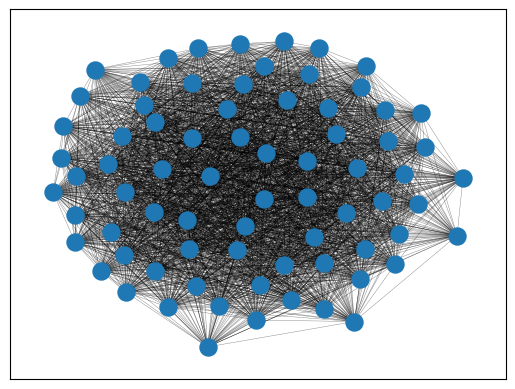

In [146]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

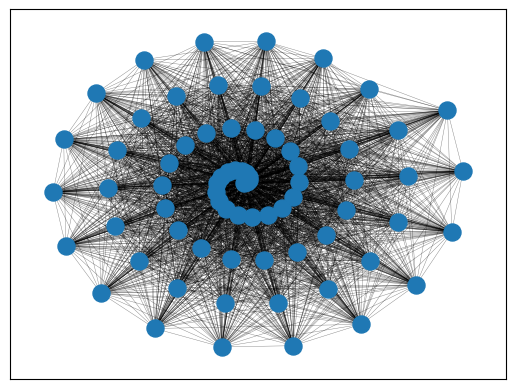

In [147]:
pos = nx.spiral_layout(G)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

In [ ]:
pos = nx.kamada_kawai_layout(H)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

In [6]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

top_20_nodes = [n for n, d in G.degree() if d in degree_sequence[:20]]
top_20_degrees = [G.degree(node) for node in top_20_nodes]

plt.barh(top_20_nodes, top_20_degrees, color=cmap.colors)

plt.xlabel("Grado")
plt.xticks(fontsize=8)

plt.ylabel("Nodi")
plt.yticks(fontsize=5)
plt.title("I 20 nodi con grado maggiore")
plt.show()

NameError: name 'cmap' is not defined

# DEGREE CENTRALITY

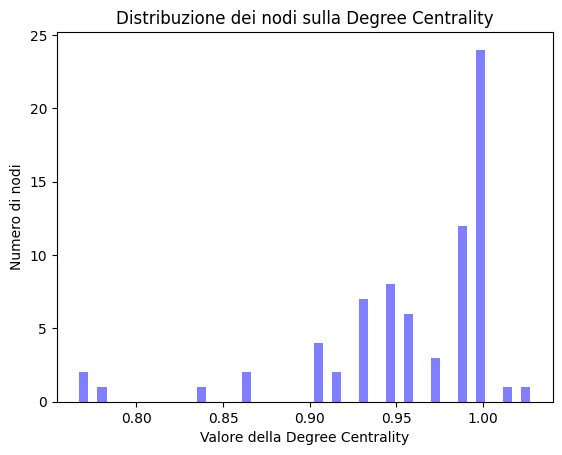

In [149]:
degree_centrality = nx.degree_centrality(G)

# Creiamo una lista dei valori di betweenness centrality dei nodi
values = list(degree_centrality.values())
values.sort(reverse=True)

# Disegniamo il grafico istogramma
plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Valore della Degree Centrality')
plt.ylabel('Numero di nodi')
plt.title('Distribuzione dei nodi sulla Degree Centrality')
plt.show()

In [7]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

top_20_nodes = sorted_degree_centrality[:20]
top_20_values = [x[1] for x in top_20_nodes]
top_20_labels = [x[0] for x in top_20_nodes]

plt.barh(top_20_labels, top_20_values, color=cmap.colors)

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Degree Centrality')
plt.xticks(fontsize=8)

plt.title('Top 20 nodi con maggior Degree Centrality')
plt.show()

for i, n in top_20_nodes:
    print(i, n)


NameError: name 'cmap' is not defined

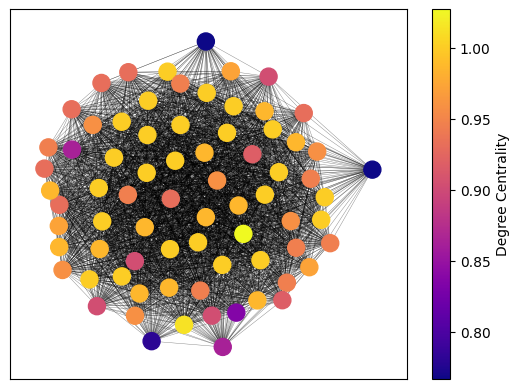

In [160]:
degree_centrality = nx.degree_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(degree_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Degree Centrality")
plt.show()


# BETWEENESS CENTRALITY

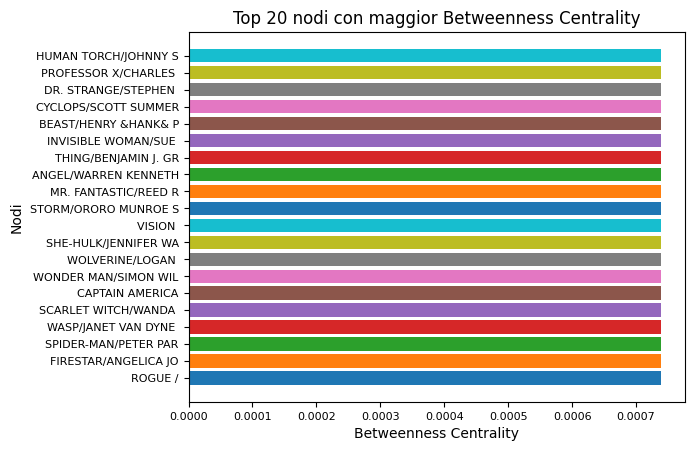

ROGUE / 0.0007388528972611843
FIRESTAR/ANGELICA JO 0.0007388528972611843
SPIDER-MAN/PETER PAR 0.0007388528972611843
WASP/JANET VAN DYNE  0.0007388528972611843
SCARLET WITCH/WANDA  0.0007388528972611843
CAPTAIN AMERICA 0.0007388528972611843
WONDER MAN/SIMON WIL 0.0007388528972611843
WOLVERINE/LOGAN  0.0007388528972611843
SHE-HULK/JENNIFER WA 0.0007388528972611843
VISION  0.0007388528972611843
STORM/ORORO MUNROE S 0.0007388528972611843
MR. FANTASTIC/REED R 0.0007388528972611843
ANGEL/WARREN KENNETH 0.0007388528972611843
THING/BENJAMIN J. GR 0.0007388528972611843
INVISIBLE WOMAN/SUE  0.0007388528972611843
BEAST/HENRY &HANK& P 0.0007388528972611843
CYCLOPS/SCOTT SUMMER 0.0007388528972611843
DR. STRANGE/STEPHEN  0.0007388528972611843
PROFESSOR X/CHARLES  0.0007388528972611843
HUMAN TORCH/JOHNNY S 0.0007388528972611843


In [161]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

top_20_nodes = sorted_betweenness_centrality[:20]
top_20_values = [x[1] for x in top_20_nodes]
top_20_labels = [x[0] for x in top_20_nodes]

plt.barh(top_20_labels, top_20_values, color=cmap.colors)

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Betweenness Centrality')
plt.xticks(fontsize=8)

plt.title('Top 20 nodi con maggior Betweenness Centrality')
plt.show()

for i, n in top_20_nodes:
    print(i, n)


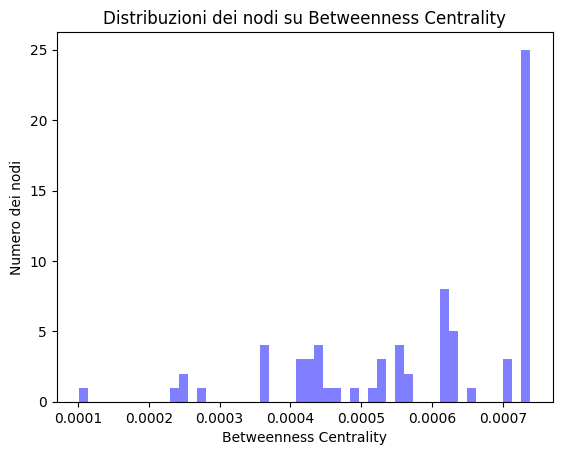

In [162]:
betweenness_centrality = nx.betweenness_centrality(G)

values = list(betweenness_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Betweenness Centrality')
plt.show()

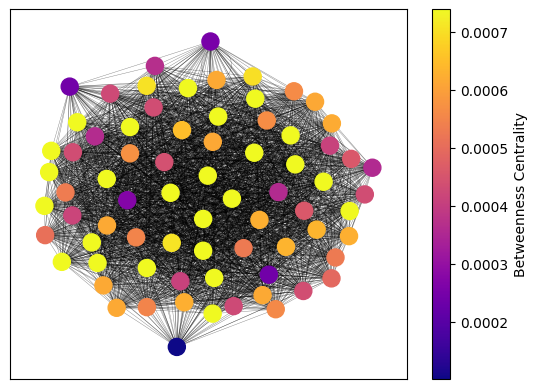

In [165]:
betweenness_centrality = nx.betweenness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(betweenness_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Betweenness Centrality")
plt.show()

# CLOSENESS CENTRALITY

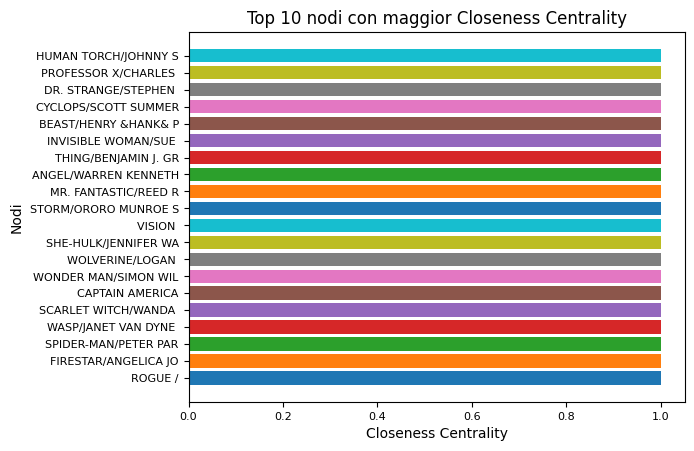

ROGUE / 1.0
FIRESTAR/ANGELICA JO 1.0
SPIDER-MAN/PETER PAR 1.0
WASP/JANET VAN DYNE  1.0
SCARLET WITCH/WANDA  1.0
CAPTAIN AMERICA 1.0
WONDER MAN/SIMON WIL 1.0
WOLVERINE/LOGAN  1.0
SHE-HULK/JENNIFER WA 1.0
VISION  1.0
STORM/ORORO MUNROE S 1.0
MR. FANTASTIC/REED R 1.0
ANGEL/WARREN KENNETH 1.0
THING/BENJAMIN J. GR 1.0
INVISIBLE WOMAN/SUE  1.0
BEAST/HENRY &HANK& P 1.0
CYCLOPS/SCOTT SUMMER 1.0
DR. STRANGE/STEPHEN  1.0
PROFESSOR X/CHARLES  1.0
HUMAN TORCH/JOHNNY S 1.0


In [168]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

top_20_nodes = sorted_closeness_centrality[:20]
top_20_values = [x[1] for x in top_20_nodes]
top_20_labels = [x[0] for x in top_20_nodes]

plt.barh(top_20_labels, top_20_values, color=cmap.colors)

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Closeness Centrality')
plt.xticks(fontsize=8)

plt.title('Top 10 nodi con maggior Closeness Centrality')
plt.show()

for i, n in top_20_nodes:
    print(i, n)



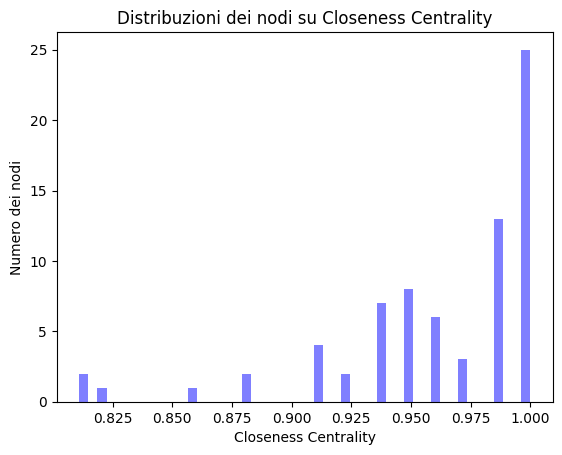

In [95]:
closeness_centrality = nx.closeness_centrality(G)

values = list(closeness_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Closeness Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Closeness Centrality')
plt.show()

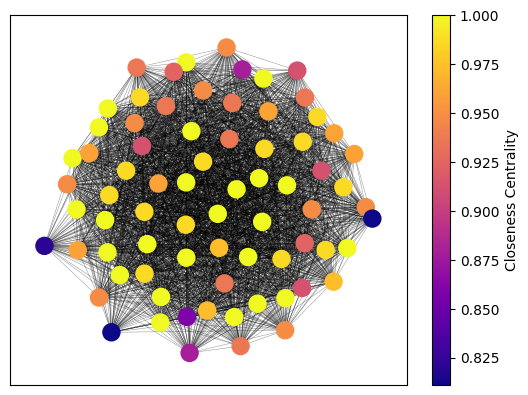

In [96]:
closeness_centrality = nx.closeness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(closeness_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Closeness Centrality")
plt.show()

# EIGENVECTOR CENTRALITY

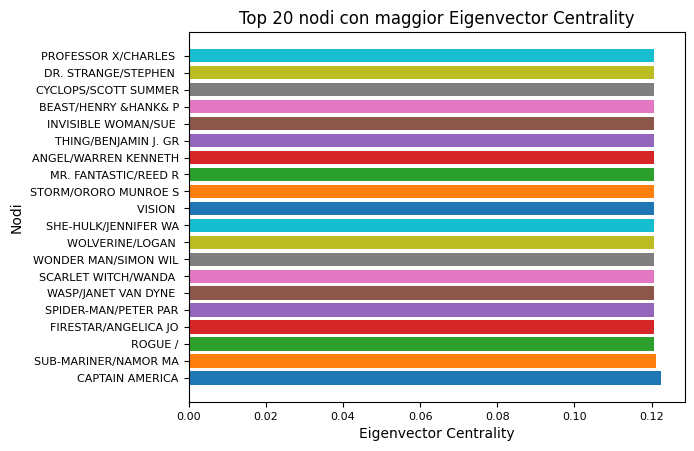

CAPTAIN AMERICA 0.12239823780741708
SUB-MARINER/NAMOR MA 0.1210655324658509
ROGUE / 0.12067873652118767
FIRESTAR/ANGELICA JO 0.12067873652118766
SPIDER-MAN/PETER PAR 0.12067873652118766
WASP/JANET VAN DYNE  0.12067873652118766
SCARLET WITCH/WANDA  0.12067873652118766
WONDER MAN/SIMON WIL 0.12067873652118766
WOLVERINE/LOGAN  0.12067873652118766
SHE-HULK/JENNIFER WA 0.12067873652118766
VISION  0.12067873652118766
STORM/ORORO MUNROE S 0.12067873652118766
MR. FANTASTIC/REED R 0.12067873652118766
ANGEL/WARREN KENNETH 0.12067873652118766
THING/BENJAMIN J. GR 0.12067873652118766
INVISIBLE WOMAN/SUE  0.12067873652118766
BEAST/HENRY &HANK& P 0.12067873652118766
CYCLOPS/SCOTT SUMMER 0.12067873652118766
DR. STRANGE/STEPHEN  0.12067873652118766
PROFESSOR X/CHARLES  0.12067873652118766


In [169]:
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

top_20_nodes = sorted_eigenvector_centrality[:20]
top_20_values = [x[1] for x in top_20_nodes]
top_20_labels = [x[0] for x in top_20_nodes]

plt.barh(top_20_labels, top_20_values, color=cmap.colors)

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Eigenvector Centrality')
plt.xticks(fontsize=8)

plt.title('Top 20 nodi con maggior Eigenvector Centrality')
plt.show()

for i, n in top_20_nodes:
    print(i, n)

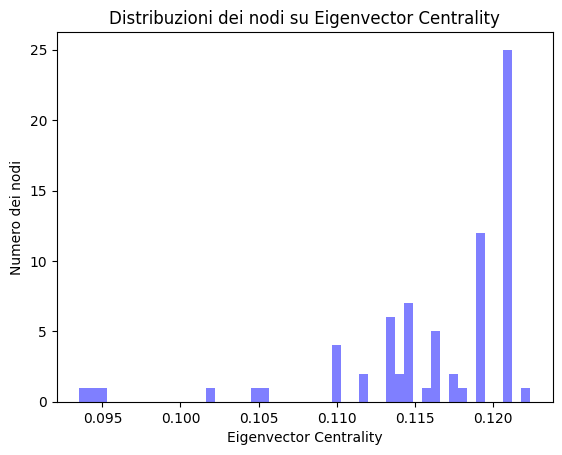

In [98]:
eigenvector_centrality = nx.eigenvector_centrality(G)

values = list(eigenvector_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Eigenvector Centrality')
plt.show()

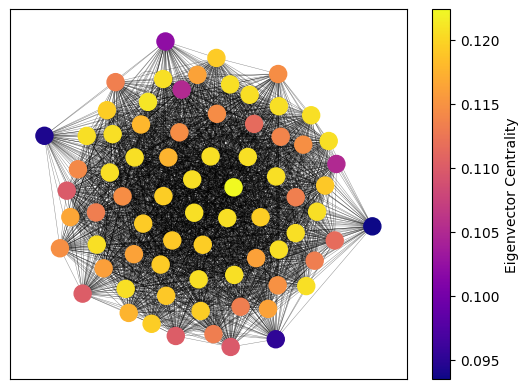

In [84]:
eigenvector_centrality = nx.eigenvector_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(eigenvector_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Eigenvector Centrality")
plt.show()

In [8]:
import networkx as nx
from networkx.algorithms import community

# Calcola le comunità utilizzando l'algoritmo di modularity maximization
communities = community.greedy_modularity_communities(G)

# Stampa le comunità e i nodi al loro interno
for i, com in enumerate(communities):
    print("Comunità {}:".format(i+1))
    print(list(com))


Comunità 1:
['MARVEL GIRL/JEAN GRE', 'PROFESSOR X/CHARLES ', 'COLOSSUS II/PETER RA', 'SUMMERS, NATHAN CHRI', 'MACTAGGERT, MOIRA KI', 'FURY, COL. NICHOLAS ', 'NOVA/RICHARD RIDER', 'SPIDER-MAN/PETER PAR', 'MOCKINGBIRD/DR. BARB', 'ROGUE /', 'SPEEDBALL/ROBBIE BAL', 'SASQUATCH/WALTER LAN', 'HUMAN TORCH/JOHNNY S', 'POLARIS/LORNA DANE', 'FORGE', 'CANNONBALL II/SAM GU', 'ICEMAN/ROBERT BOBBY ', 'DR. DRUID/ANTHONY LU', 'BLACK KNIGHT V/DANE ', 'WOLFSBANE/RAHNE SINC', 'GAMBIT/REMY LEBEAU ', 'MOONDRAGON/HEATHER D', 'SUNSPOT/ROBERTO DACO', 'THUNDERSTRIKE/ERIC K', 'NAMORITA/NITA PRENTI', 'CAPTAIN BRITAIN/BRIA', 'PSYLOCKE/ELISABETH B', 'MAGNETO/MAGNUS/ERIC ', 'SCARLET WITCH/WANDA ', 'QUICKSILVER/PIETRO M', 'BANSHEE/SEAN CASSIDY', 'STORM/ORORO MUNROE S', 'HAVOK/ALEX SUMMERS ', 'CYCLOPS/SCOTT SUMMER', 'RICHARDS, FRANKLIN B', 'SHADOWCAT/KATHERINE ', 'NIGHTCRAWLER/KURT WA', 'ANGEL/WARREN KENNETH', 'BEAST/HENRY &HANK& P', 'THUNDERBIRD II/JAMES', 'FIRESTAR/ANGELICA JO', 'INVISIBLE WOMAN/SUE ', 'BINARY/CAROL

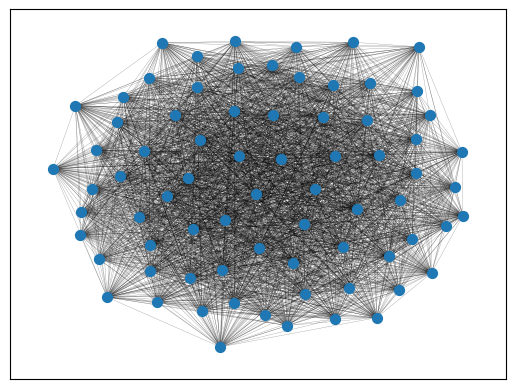

In [61]:
cliques = list(nx.find_cliques(G))

cliques_graph = G.subgraph(sum(cliques, []))
pos = nx.spring_layout(G) 

nx.draw_networkx_edges(cliques_graph, pos, alpha=0.5, width=0.2)
nx.draw_networkx_nodes(cliques_graph, pos, node_size=50)

plt.show()

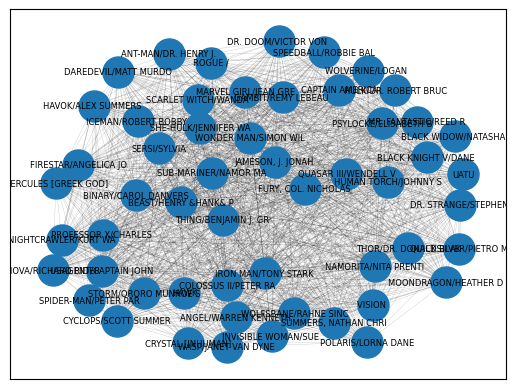

In [62]:
cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=max_clique, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=nx.subgraph(G, max_clique).edges, alpha=0.3, width=0.2)
nx.draw_networkx_labels(G, pos, labels={n:n for n in max_clique}, font_size=6)

plt.show()

In [23]:
import networkx as nx

# Trova le comunità utilizzando l'algoritmo greedy_modularity_communities()
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Stampa il numero di comunità e i nodi in ciascuna comunità
print(f"Numero di comunità trovate: {len(communities)}")
for i, community in enumerate(communities):
    print(f"Comunità {i+1}: {list(community)}")


Numero di comunità trovate: 3
Comunità 1: ['MARVEL GIRL/JEAN GRE', 'PROFESSOR X/CHARLES ', 'COLOSSUS II/PETER RA', 'SUMMERS, NATHAN CHRI', 'MACTAGGERT, MOIRA KI', 'FURY, COL. NICHOLAS ', 'NOVA/RICHARD RIDER', 'SPIDER-MAN/PETER PAR', 'MOCKINGBIRD/DR. BARB', 'ROGUE /', 'SPEEDBALL/ROBBIE BAL', 'SASQUATCH/WALTER LAN', 'HUMAN TORCH/JOHNNY S', 'POLARIS/LORNA DANE', 'FORGE', 'CANNONBALL II/SAM GU', 'ICEMAN/ROBERT BOBBY ', 'DR. DRUID/ANTHONY LU', 'BLACK KNIGHT V/DANE ', 'WOLFSBANE/RAHNE SINC', 'GAMBIT/REMY LEBEAU ', 'MOONDRAGON/HEATHER D', 'SUNSPOT/ROBERTO DACO', 'THUNDERSTRIKE/ERIC K', 'NAMORITA/NITA PRENTI', 'CAPTAIN BRITAIN/BRIA', 'PSYLOCKE/ELISABETH B', 'MAGNETO/MAGNUS/ERIC ', 'SCARLET WITCH/WANDA ', 'QUICKSILVER/PIETRO M', 'BANSHEE/SEAN CASSIDY', 'STORM/ORORO MUNROE S', 'HAVOK/ALEX SUMMERS ', 'CYCLOPS/SCOTT SUMMER', 'RICHARDS, FRANKLIN B', 'SHADOWCAT/KATHERINE ', 'NIGHTCRAWLER/KURT WA', 'ANGEL/WARREN KENNETH', 'BEAST/HENRY &HANK& P', 'THUNDERBIRD II/JAMES', 'FIRESTAR/ANGELICA JO', 'INVISI

In [24]:
communities.remove(communities[2])

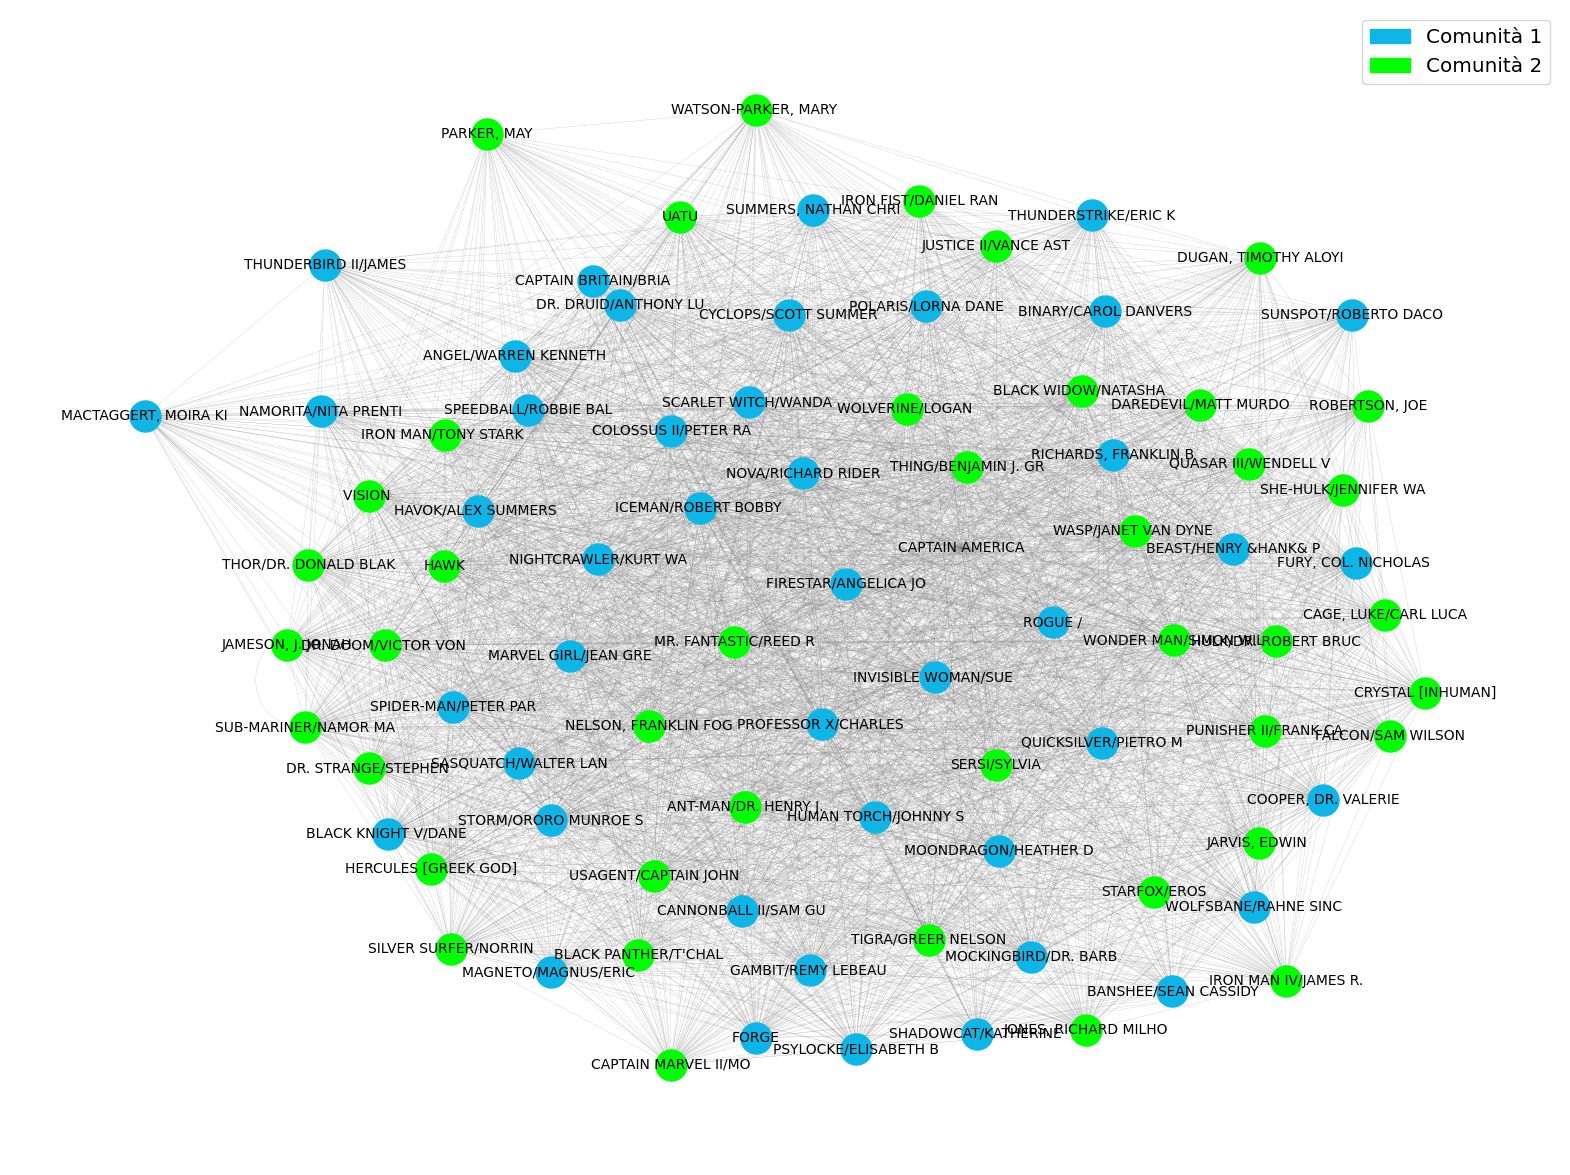

In [26]:
import matplotlib.pyplot as plt

# Imposta il layout del grafo
pos = nx.spring_layout(G, seed=42)

# Colori per le diverse comunità
colors = ["#0EB6E7", "#00FF00", "#FF0000"] 

# Crea il grafico
plt.figure(figsize=(20,15))
for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(com), node_color=colors[i], node_size=500)
nx.draw_networkx_edges(G, pos=pos, edge_color='gray', width=0.1)
nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G.nodes()}, font_size=10)

# Nasconde gli assi del grafico
plt.axis('off')
# Visualizza la legenda dei colori
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=f"Comunità {i+1}") for i in range(len(communities))]
plt.legend(handles=patches, ncol=1, fontsize='x-large')

# Visualizza il grafico
plt.show()



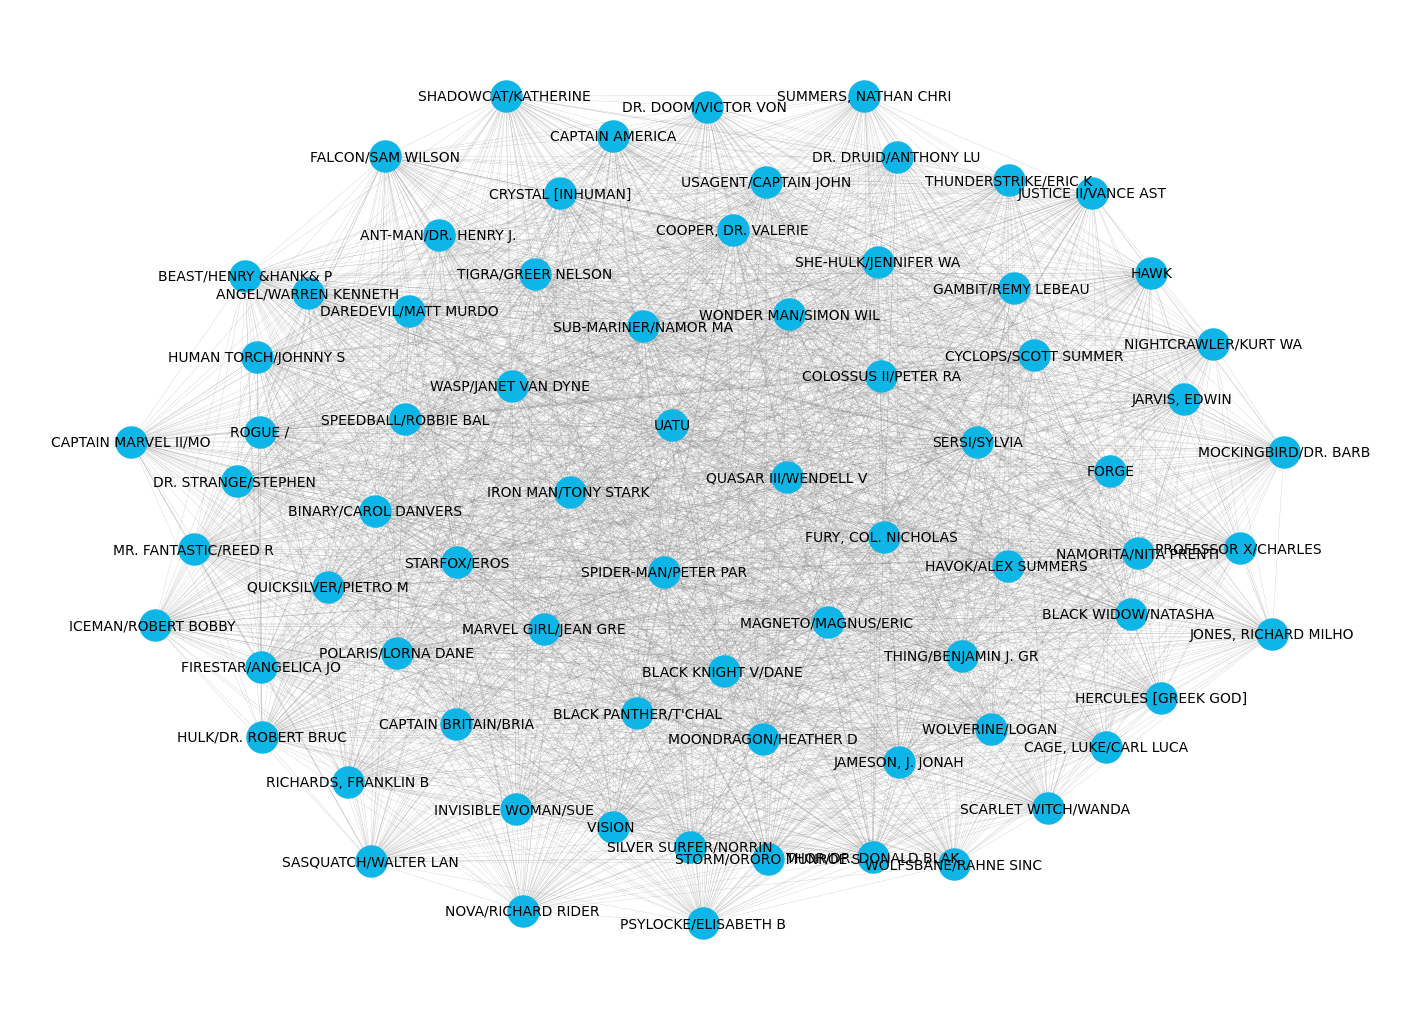

In [30]:
K = G.copy()
K.remove_edges_from(nx.selfloop_edges(K))
kcore = nx.k_core(K)

# Imposta il layout del grafo
pos = nx.spring_layout(kcore, seed=42)

# Crea il grafico
plt.figure(figsize=(18,13))
nx.draw_networkx_nodes(kcore, pos=pos, node_color='#0EB6E7', node_size=500)
nx.draw_networkx_edges(kcore, pos=pos, edge_color='gray', width=0.1)
nx.draw_networkx_labels(kcore, pos=pos, labels={n: n for n in kcore.nodes()}, font_size=10)

# Nasconde gli assi del grafico
plt.axis('off')

# Visualizza il grafico
plt.show()
